In [ ]:
from keras.models import load_model
loaded_model = load_model('cifar10_model.keras')

Tarea

- Crear una red convolucional con el dataset MNIST
- Guardar el modelo con .save
- Hacer Predicciones con imagenes
- Realizar metricas de evaluación

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shapes of the data to verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
import tensorflow as tf

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 90s 47ms/step - accuracy: 0.8983 - loss: 0.3435
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 36ms/step - accuracy: 0.9815 - loss: 0.0601
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9873 - loss: 0.0396
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9897 - loss: 0.0326
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9925 - loss: 0.0228
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9854 - loss: 0.0484
Test accuracy: 0.9882000088691711


In [ ]:
model.save("mnist_model.keras")
print("Model saved as mnist_model.h5")

Model saved as mnist_model.h5


In [ ]:
predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [ ]:
y_pred = predict.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

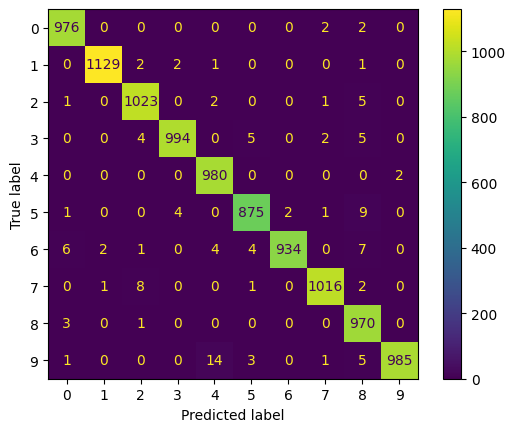

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Assuming labels are 0, 1, 2
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.97      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.96      1.00      0.98       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

